In [2]:
from bs4 import BeautifulSoup
import json
import pandas as pd

C:\Users\hrkwl\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### HTML tables - Dictionary - JSON String


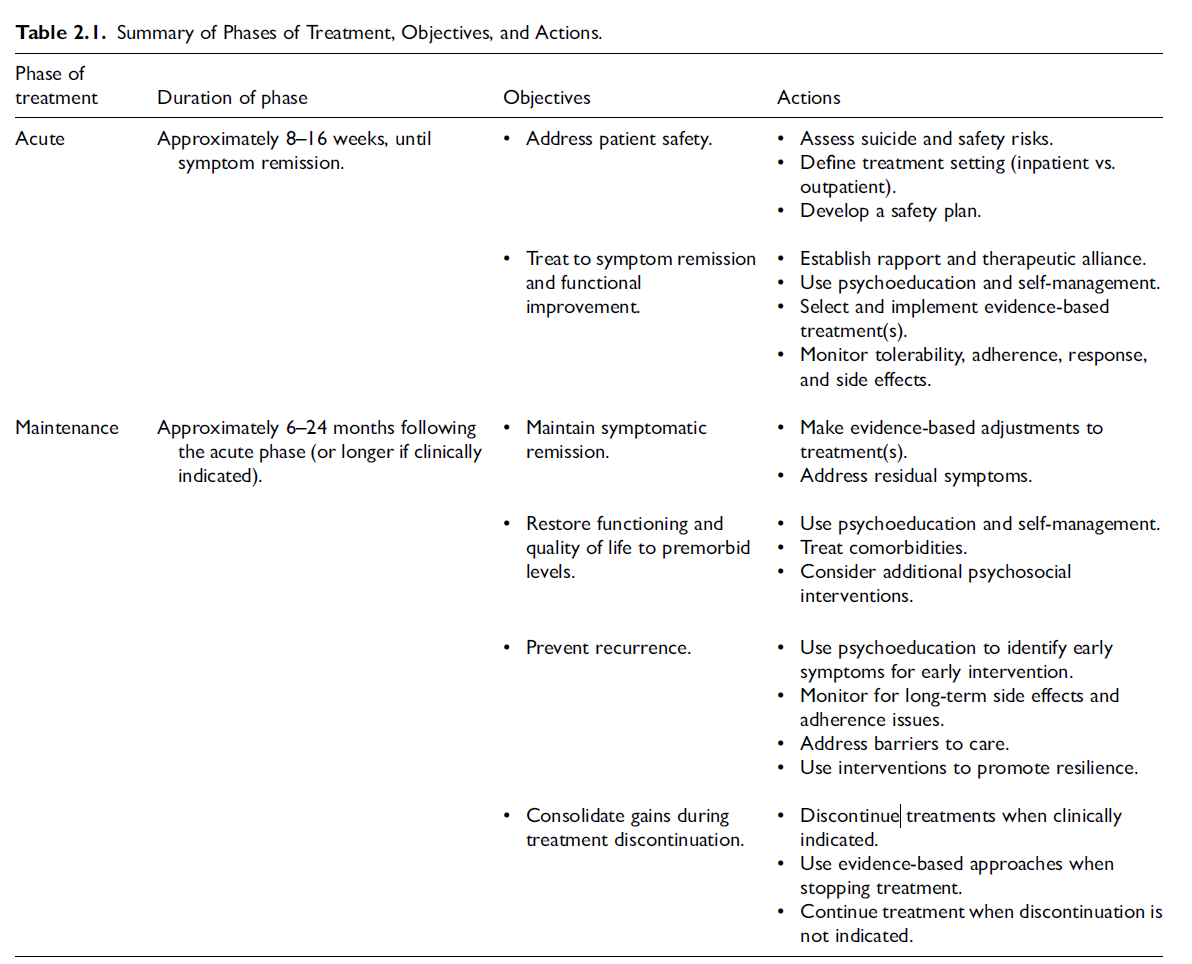

In [3]:
## Sample table
with open("../data/table2-1.html", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html)
tbl1 = soup.find_all("table")[0]

In [43]:
def get_table_metadata(soup):

    table_section = soup.select_one('[id^="table"]')
    table_name = table_section.h1.text
    table_caption = table_section.select_one('.caption p').text
    table_label = table_name + " " + table_caption
    
    return table_name, table_caption, table_label


In [44]:
table_name, table_caption, table_label = get_table_metadata(soup)

In [21]:
table_data = []


rowspan_tracker = {}


for row_index, tr in enumerate(tbl1.find_all("tr")):
    row = []
    col_index = 0  

    
    while col_index in rowspan_tracker:
        value, remaining = rowspan_tracker[col_index]
        row.append(value)
        remaining -= 1
        if remaining == 0:
            del rowspan_tracker[col_index]
        else:
            rowspan_tracker[col_index] = (value, remaining)
        col_index += 1

    
    for cell in tr.find_all(["td", "th"]):
        
        cell_text =  cell.get_text(separator=" ", strip=True)
        rowspan = int(cell.get("rowspan", 1))

        row.append(cell_text)

        if rowspan > 1:
            rowspan_tracker[col_index] = (cell_text, rowspan - 1)

        col_index += 1

    table_data.append(row)


df = pd.DataFrame(table_data[1:], columns=table_data[0])
df

,Phase of treatment,Duration of phase,Objectives,Actions
0,Acute,"Approximately 8–16 weeks, until symptom remiss...",Address patient safety.,Assess suicide and safety risks. Define treatm...
1,Acute,"Approximately 8–16 weeks, until symptom remiss...",Treat to symptom remission and functional impr...,Establish rapport and therapeutic alliance. Us...
2,Maintenance,Approximately 6–24 months following the acute ...,Maintain symptomatic remission.,Make evidence-based adjustments to treatment(s...
3,Maintenance,Approximately 6–24 months following the acute ...,Restore functioning and quality of life to pre...,Use psychoeducation and self-management. Treat...
4,Maintenance,Approximately 6–24 months following the acute ...,Prevent recurrence.,Use psychoeducation to identify early symptoms...
5,Maintenance,Approximately 6–24 months following the acute ...,Consolidate gains during treatment discontinua...,Discontinue treatments when clinically indicat...


_Copy the values in the column to each empty cell._

In [22]:
table_data

[['Phase of treatment', 'Duration of phase', 'Objectives', 'Actions'],
 ['Acute',
  'Approximately 8–16 weeks, until symptom remission.',
  'Address patient safety.',
  'Assess suicide and safety risks. Define treatment setting (inpatient vs. outpatient). Develop a safety plan.'],
 ['Acute',
  'Approximately 8–16 weeks, until symptom remission.',
  'Treat to symptom remission and functional improvement.',
  'Establish rapport and therapeutic alliance. Use psychoeducation and self-management. Select and implement evidence-based treatment(s). Monitor tolerability, adherence, response, and side effects.'],
 ['Maintenance',
  'Approximately 6–24 months following the acute phase (or longer if clinically indicated).',
  'Maintain symptomatic remission.',
  'Make evidence-based adjustments to treatment(s). Address residual symptoms.'],
 ['Maintenance',
  'Approximately 6–24 months following the acute phase (or longer if clinically indicated).',
  'Restore functioning and quality of life to pr

In [24]:
def to_text(table_data):
  
    lines = []

    lines.append(f"[Table: {table_label}]")
    lines.append(f"Caption: {table_caption}")


    for i, row in enumerate(table_data[1:]):
        row_text = ", ".join([f"{k}: {v}" for k, v in zip(table_data[0], row)])
        lines.append(f"Row {i} — {row_text}")

    return "\n".join(lines)

text_block = to_text(table_data)


In [26]:
print(text_block)

[Table: Table 2.1. Summary of Phases of Treatment, Objectives, and Actions.]
Caption: Summary of Phases of Treatment, Objectives, and Actions.
Row 0 — Phase of treatment: Acute, Duration of phase: Approximately 8–16 weeks, until symptom remission., Objectives: Address patient safety., Actions: Assess suicide and safety risks. Define treatment setting (inpatient vs. outpatient). Develop a safety plan.
Row 1 — Phase of treatment: Acute, Duration of phase: Approximately 8–16 weeks, until symptom remission., Objectives: Treat to symptom remission and functional improvement., Actions: Establish rapport and therapeutic alliance. Use psychoeducation and self-management. Select and implement evidence-based treatment(s). Monitor tolerability, adherence, response, and side effects.
Row 2 — Phase of treatment: Maintenance, Duration of phase: Approximately 6–24 months following the acute phase (or longer if clinically indicated)., Objectives: Maintain symptomatic remission., Actions: Make evidence

In [40]:
def get_referee_id(table_name):
    number = "_".join([char for char in table_name if char.isdigit()])
    return f"table_{number}"
referee_id = get_referee_id(table_name)
referee_id

'table_2_1'

In [41]:
d = {
    "text": text_block,
    "metadata": {
        "section": "section2-07067437241245384",
        "type": "figure table",
        "referee_id": referee_id,
        "headings": "Question 2 > Q.2.a.",
        }
    }

In [42]:
json_obj = json.dumps(d,indent=2)

print(json_obj)

{
  "text": "[Table: Table 2.1. Summary of Phases of Treatment, Objectives, and Actions.]\nCaption: Summary of Phases of Treatment, Objectives, and Actions.\nRow 0 \u2014 Phase of treatment: Acute, Duration of phase: Approximately 8\u201316 weeks, until symptom remission., Objectives: Address patient safety., Actions: Assess suicide and safety risks. Define treatment setting (inpatient vs. outpatient). Develop a safety plan.\nRow 1 \u2014 Phase of treatment: Acute, Duration of phase: Approximately 8\u201316 weeks, until symptom remission., Objectives: Treat to symptom remission and functional improvement., Actions: Establish rapport and therapeutic alliance. Use psychoeducation and self-management. Select and implement evidence-based treatment(s). Monitor tolerability, adherence, response, and side effects.\nRow 2 \u2014 Phase of treatment: Maintenance, Duration of phase: Approximately 6\u201324 months following the acute phase (or longer if clinically indicated)., Objectives: Maintain